***IMPORTING NECESSARY LIBRARIES***

In [ ]:
import os
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

***MAKING A DIRECTORY COMPRSIED OF SAMPLE IMAGES***

In [ ]:
!mkdir sample_images
!wget -q -O sample_images/cat.jpg https://upload.wikimedia.org/wikipedia/commons/3/3a/Cat03.jpg
!wget -q -O sample_images/dog.jpg https://upload.wikimedia.org/wikipedia/commons/b/b9/Panther_chameleon_%28Furcifer_pardalis%29_male_Montagne_d%E2%80%99Ambre.jpg
!wget -q -O sample_images/elephant.jpg https://upload.wikimedia.org/wikipedia/commons/3/37/African_Bush_Elephant.jpg

***TRAINING PRETRAINED MODEL "MOBILENETV2" ON "IMAGENET" DATASET***

In [ ]:
model = MobileNetV2(weights='imagenet')

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


***RESIZING SMAPLE IMAGES AS IN MOBILENETV2 MODEL***

In [ ]:
def load_and_preprocess(img_path, target_size=(224, 224)):
    """
    Loads an image from disk, resizes it, converts it to an array,
    and preprocesses it for MobileNetV2.
    """
    img = image.load_img(img_path, target_size=target_size)  # Resize
    img_array = image.img_to_array(img)  # Convert to NumPy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # MobileNetV2 preprocessing
    return img_array

***PREDICITNG AND DISPLAYING RESULTS***

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


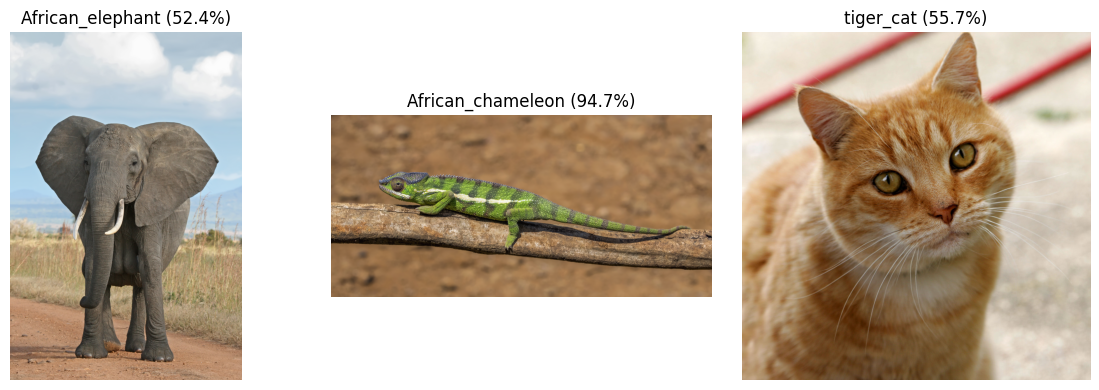

In [ ]:
plt.figure(figsize=(12, 4))
img_dir = "sample_images"
img_files = os.listdir(img_dir)

for i, img_file in enumerate(img_files):
    img_path = os.path.join(img_dir, img_file)

    # Preprocess
    processed_img = load_and_preprocess(img_path)

    # Predict
    preds = model.predict(processed_img)
    decoded_preds = decode_predictions(preds, top=3)[0]  # Get top-3 predictions

    # Show image
    plt.subplot(1, len(img_files), i+1)
    img_disp = image.load_img(img_path)
    plt.imshow(img_disp)
    plt.axis("off")

    # Show predicted label and confidence
    title = f"{decoded_preds[0][1]} ({decoded_preds[0][2]*100:.1f}%)"
    plt.title(title)

plt.tight_layout()
plt.show()